# 서울시 구별 CCTV 현황 분석

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_excel('./data/CCTV_in_Seoul.xlsx')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={'기관명': '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [6]:
pop_Seoul = pd.read_csv('./data/population_in_Seoul.txt', sep='\t', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.2,"1,552,356"
3,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2,"28,396"
4,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"


In [7]:
pop_Seoul = pd.read_csv('./data/population_in_Seoul.txt', sep='\t', encoding='utf-8', usecols=['자치구', '인구', '인구.3', '인구.6', '65세이상고령자'], skiprows=[1,2])
pop_Seoul.head()

,자치구,인구,인구.3,인구.6,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [8]:
pop_Seoul.rename(columns={
    '자치구': '구별',
    '인구': '인구수',
    '인구.3': '한국인',
    '인구.6': '외국인',
    '65세이상고령자': '고령자',
}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


## 1-3 pandas 기초 익히기

In [9]:
import pandas as pd
import numpy as np

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-06,1.636698,0.961919,-0.862574,-0.506069


In [13]:
df.head(3)

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.02007137, -0.80655771,  2.07929872,  0.90546739],
       [ 0.72446298,  0.59425392, -0.09597624, -2.10009655],
       [ 0.43262869, -0.42412713, -0.04537902, -0.23673143],
       [-0.44088891, -0.21527041, -0.87341781, -0.68794832],
       [ 2.33290287,  0.40529011,  0.87767645, -0.5096518 ],
       [ 1.63669815,  0.96191939, -0.8625744 , -0.50606938]])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.784313,0.085918,0.179938,-0.522505
std,1.033164,0.674560,1.132934,0.963055
min,-0.440889,-0.806558,-0.873418,-2.100097
25%,0.123211,-0.371913,-0.670925,-0.643374
50%,0.578546,0.095010,-0.070678,-0.507861
75%,1.408639,0.547013,0.646913,-0.304066
max,2.332903,0.961919,2.079299,0.905467


In [19]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-06,1.636698,0.961919,-0.862574,-0.506069
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-01,0.020071,-0.806558,2.079299,0.905467


In [20]:
df

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-06,1.636698,0.961919,-0.862574,-0.506069


In [21]:
df['A']

2013-01-01    0.020071
2013-01-02    0.724463
2013-01-03    0.432629
2013-01-04   -0.440889
2013-01-05    2.332903
2013-01-06    1.636698
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948


In [24]:
df.loc[dates[0]]

A    0.020071
B   -0.806558
C    2.079299
D    0.905467
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.020071,-0.806558
2013-01-02,0.724463,0.594254
2013-01-03,0.432629,-0.424127
2013-01-04,-0.440889,-0.215270
2013-01-05,2.332903,0.405290
2013-01-06,1.636698,0.961919


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.724463,0.594254
2013-01-03,0.432629,-0.424127
2013-01-04,-0.440889,-0.215270


In [27]:
df.loc['20130102',['A','B']]

A    0.724463
B    0.594254
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

0.020071369568693896

In [29]:
df.iloc[3]

A   -0.440889
B   -0.215270
C   -0.873418
D   -0.687948
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.440889,-0.21527
2013-01-05,2.332903,0.40529


In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.724463,-0.095976
2013-01-03,0.432629,-0.045379
2013-01-05,2.332903,0.877676


In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731


In [33]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.806558,2.079299
2013-01-02,0.594254,-0.095976
2013-01-03,-0.424127,-0.045379
2013-01-04,-0.215270,-0.873418
2013-01-05,0.405290,0.877676
2013-01-06,0.961919,-0.862574


In [34]:
df

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-06,1.636698,0.961919,-0.862574,-0.506069


In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-06,1.636698,0.961919,-0.862574,-0.506069


In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,0.020071,NaN,2.079299,0.905467
2013-01-02,0.724463,0.594254,NaN,NaN
2013-01-03,0.432629,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,2.332903,0.405290,0.877676,NaN
2013-01-06,1.636698,0.961919,NaN,NaN


In [37]:
df2 = df.copy()

In [38]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.020071,-0.806558,2.079299,0.905467,one
2013-01-02,0.724463,0.594254,-0.095976,-2.100097,one
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731,two
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948,three
2013-01-05,2.332903,0.405290,0.877676,-0.509652,four
2013-01-06,1.636698,0.961919,-0.862574,-0.506069,three


In [39]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731,two
2013-01-05,2.332903,0.405290,0.877676,-0.509652,four


In [41]:
df

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.724463,0.594254,-0.095976,-2.100097
2013-01-03,0.432629,-0.424127,-0.045379,-0.236731
2013-01-04,-0.440889,-0.215270,-0.873418,-0.687948
2013-01-05,2.332903,0.405290,0.877676,-0.509652
2013-01-06,1.636698,0.961919,-0.862574,-0.506069


In [42]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.020071,-0.806558,2.079299,0.905467
2013-01-02,0.744534,-0.212304,1.983322,-1.194629
2013-01-03,1.177163,-0.636431,1.937943,-1.431361
2013-01-04,0.736274,-0.851701,1.064526,-2.119309
2013-01-05,3.069177,-0.446411,1.942202,-2.628961
2013-01-06,4.705875,0.515508,1.079628,-3.135030


In [43]:
df.apply(lambda x: x.max() - x.min())

A    2.773792
B    1.768477
C    2.952717
D    3.005564
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기

In [44]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [45]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


In [46]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [47]:
CCTV_Seoul['최근증가율'] = \
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) \
        / CCTV_Seoul['2011년 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,5937.500000
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,2380.000000
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,2292.592593
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,660.606061
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,398.837209


In [48]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [49]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"


In [50]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [51]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


In [52]:
# pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"


In [53]:
pop_Seoul = pop_Seoul.apply(lambda x: x.str.replace(',',''))
pop_Seoul['인구수'] = pop_Seoul['인구수'].astype(int)
pop_Seoul['한국인'] = pop_Seoul['한국인'].astype(int)
pop_Seoul['외국인'] = pop_Seoul['외국인'].astype(int)
pop_Seoul['고령자'] = pop_Seoul['고령자'].astype(int)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [54]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [55]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [56]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
17,구로구,435751,405579,30172,69312,6.924138,15.906332
18,금천구,249641,232157,17484,39361,7.003657,15.767041
21,관악구,514555,498574,15981,78206,3.105790,15.198764
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [57]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [58]:
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
11,노원구,529532,525486,4046,84612,0.764071,15.978638
12,은평구,485842,481546,4296,84353,0.884238,17.362229
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [59]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229


## 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

In [60]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

In [61]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [62]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [63]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [64]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [65]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [66]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [67]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [68]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [69]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'C': ['C2', 'C3', 'C6', 'C7'],
                    'D': ['D2', 'D3', 'D6', 'D7']},
                    index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)

In [70]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [71]:
df4

,B,C,D
2,B2,C2,D2
3,B3,C3,D3
6,B6,C6,D6
7,B7,C7,D7


In [72]:
result

,A,B,C,D,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,C2,D2
3,A3,B3,C3,D3,B3,C3,D3
6,NaN,NaN,NaN,NaN,B6,C6,D6
7,NaN,NaN,NaN,NaN,B7,C7,D7


In [73]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,C,D
2,A2,B2,C2,D2,B2,C2,D2
3,A3,B3,C3,D3,B3,C3,D3


In [74]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,NaN,B2,C2,D2
5,NaN,B3,C3,D3
6,NaN,B6,C6,D6
7,NaN,B7,C7,D7


In [75]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})

In [76]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [77]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [78]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [79]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [80]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [81]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [82]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [83]:
CCTV_Seoul['구별'] = CCTV_Seoul['구별'].str.replace(' ','')
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,131.023102,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,194.650206,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,277.168950,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764


In [84]:
del data_result['2011년 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,387.0,134.0,273,385,131.023102,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,88.0,141.0,1,319,194.650206,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,155.0,118.0,264,254,277.168950,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764


In [85]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,387.0,134.0,273,385,131.023102,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,88.0,141.0,1,319,194.650206,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,155.0,118.0,264,254,277.168950,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764


In [86]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.45361392],
       [-0.45361392,  1.        ]])

In [87]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.06150919],
       [-0.06150919,  1.        ]])

In [88]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38021221],
       [0.38021221, 1.        ]])

In [89]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764
구로구,3227,219.0,349.0,540,486,91.666667,435751,405579,30172,69312,6.924138,15.906332
성북구,3003,84.0,304.0,285,643,116.559692,449871,439719,10152,73370,2.256647,16.309120
은평구,2962,83.0,99.0,229,367,60.000000,485842,481546,4296,84353,0.884238,17.362229


In [90]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
송파구,1586,99.0,88.0,116,396,47.833333,676673,670331,6342,92149,0.937233,13.617951
강서구,1617,155.0,118.0,264,254,277.168950,589536,583544,5992,88052,1.016393,14.935814
강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
노원구,1906,117.0,203.0,110,156,174.428274,529532,525486,4046,84612,0.764071,15.978638
관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764


In [122]:
data_result.to_csv('./data/cctv_result.csv', sep=',', encoding='utf-8')

## 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

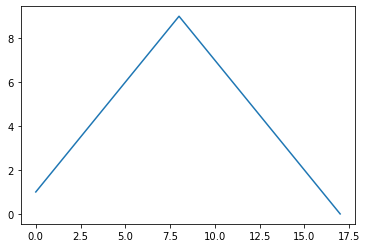

In [93]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [94]:
import numpy as np
t = np.arange(0, 12, 0.01)
y = np.sin(t)

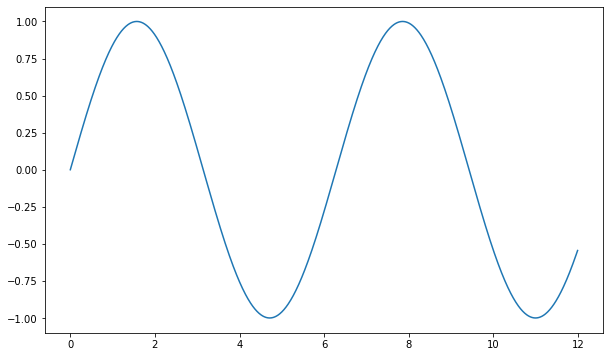

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.show()

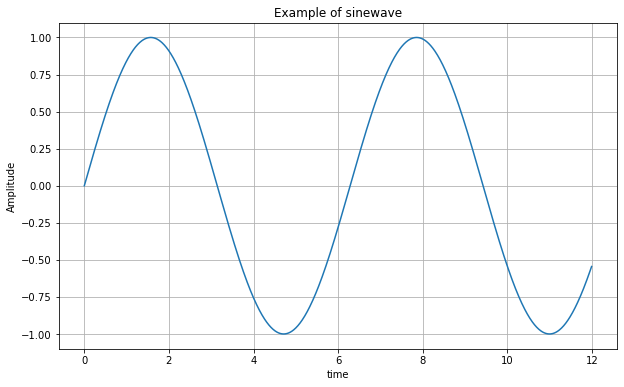

In [96]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

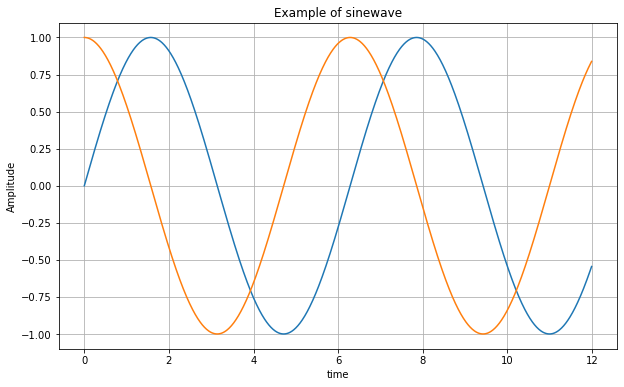

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

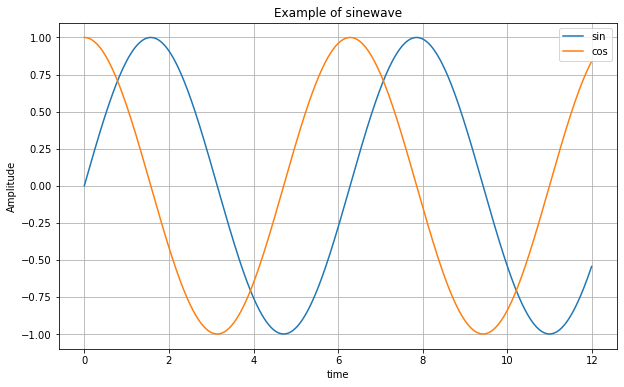

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

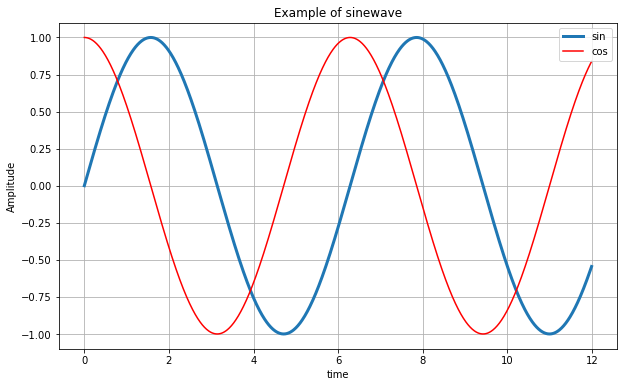

In [99]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

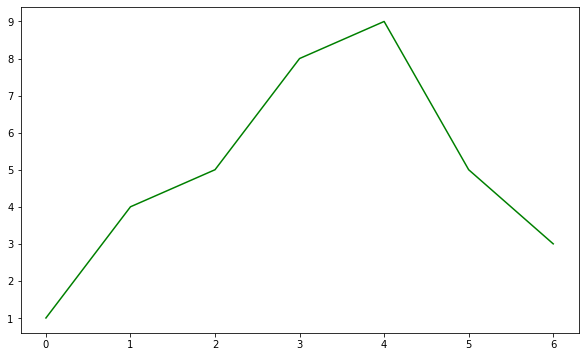

In [100]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

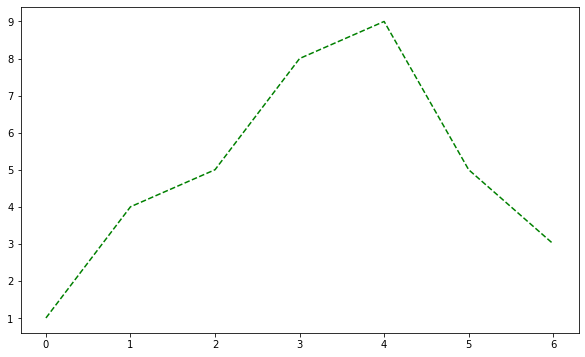

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

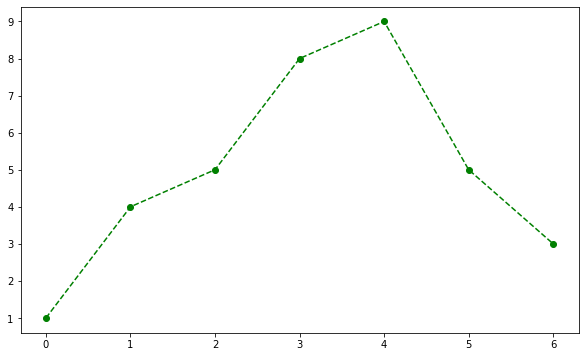

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

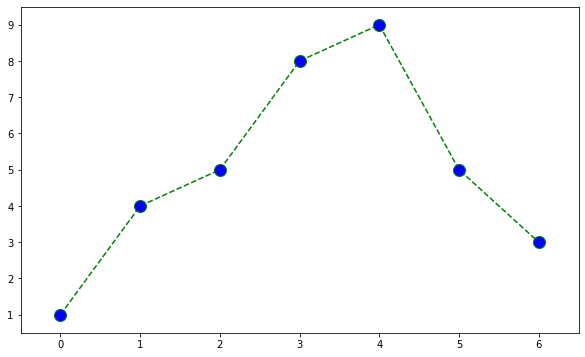

In [103]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [104]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

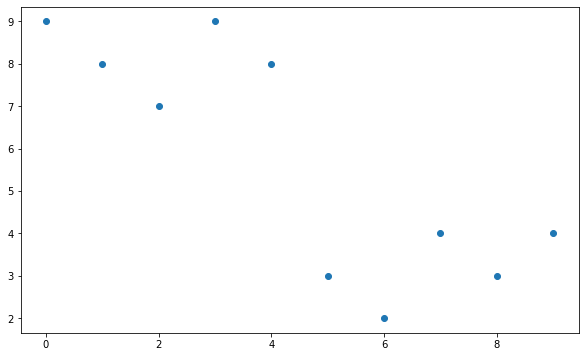

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

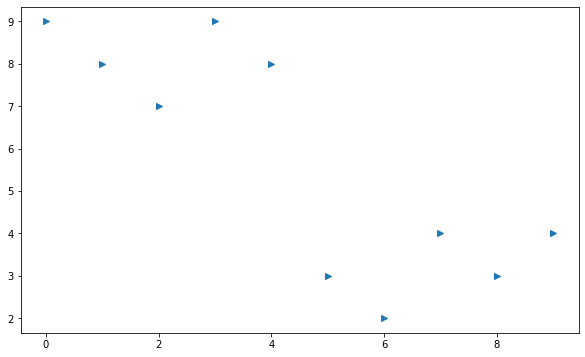

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

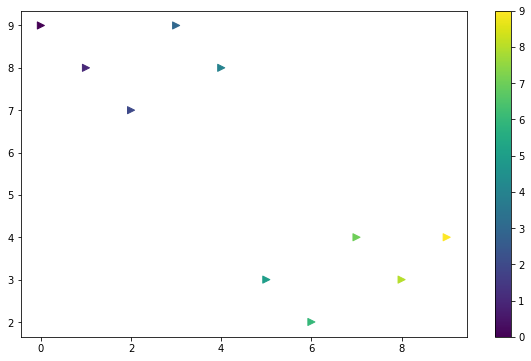

In [107]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [108]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

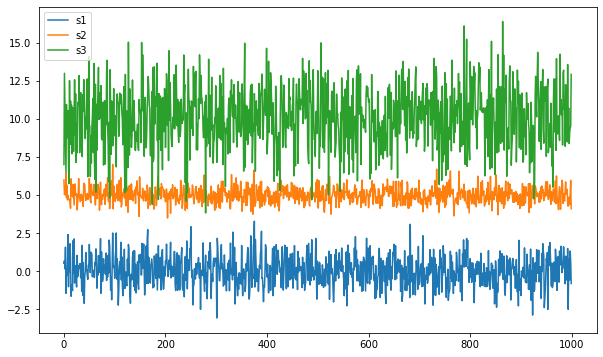

In [109]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

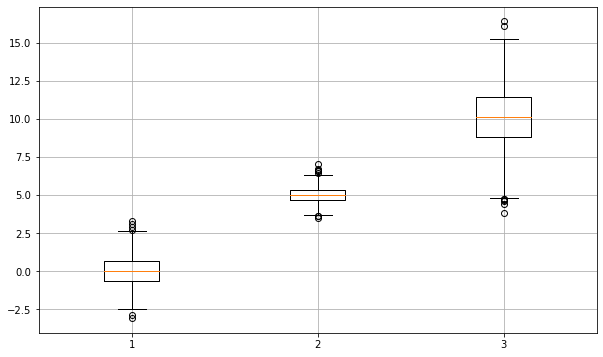

In [110]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

## 1-8 CCTV 현황 그래프로 분석하기

In [111]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('fonr', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [112]:
data_result.head()

,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,387.0,134.0,273,385,131.023102,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,88.0,141.0,1,319,194.650206,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,155.0,118.0,264,254,277.168950,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764


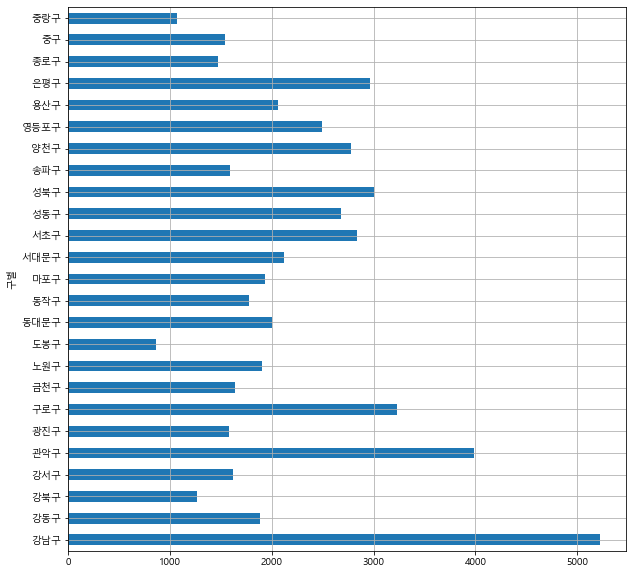

In [113]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

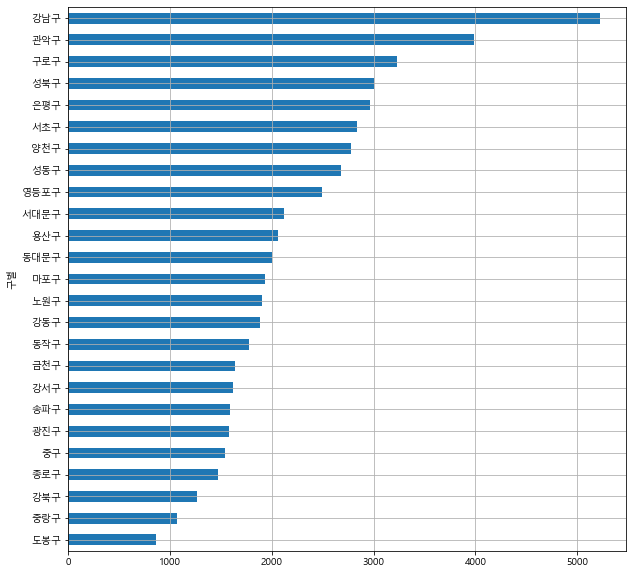

In [114]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

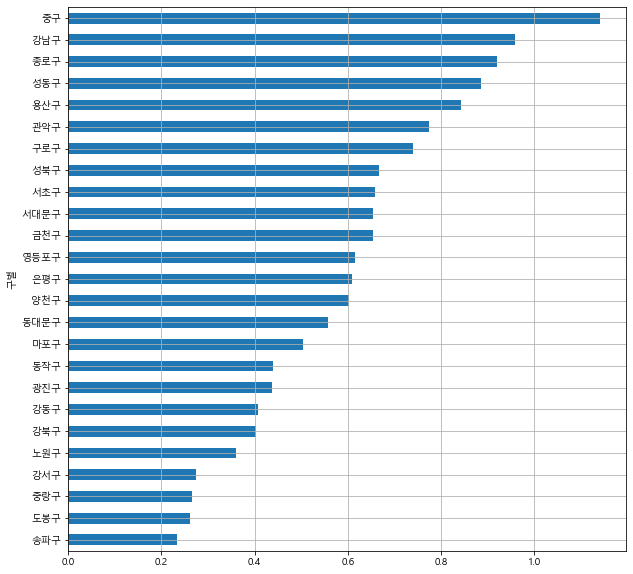

In [115]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

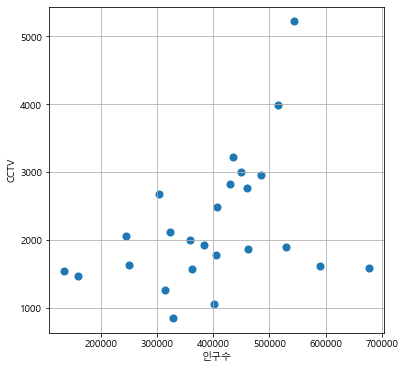

In [116]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [117]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [118]:
f1 = np.poly1d(fp1)
fx = np.linspace(10000, 700000, 100)

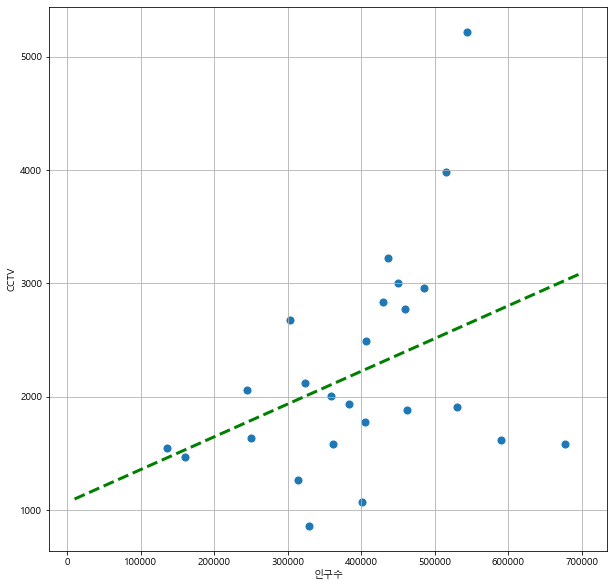

In [119]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [120]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,2012년,2013년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,
강남구,5221,195.0,316.0,577,448,89.557613,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,99.0,88.0,116,396,47.833333,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,56.0,419.0,694,671,398.837209,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.0,8.0,117,71,202.538071,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,NaN,NaN,66,9,NaN,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


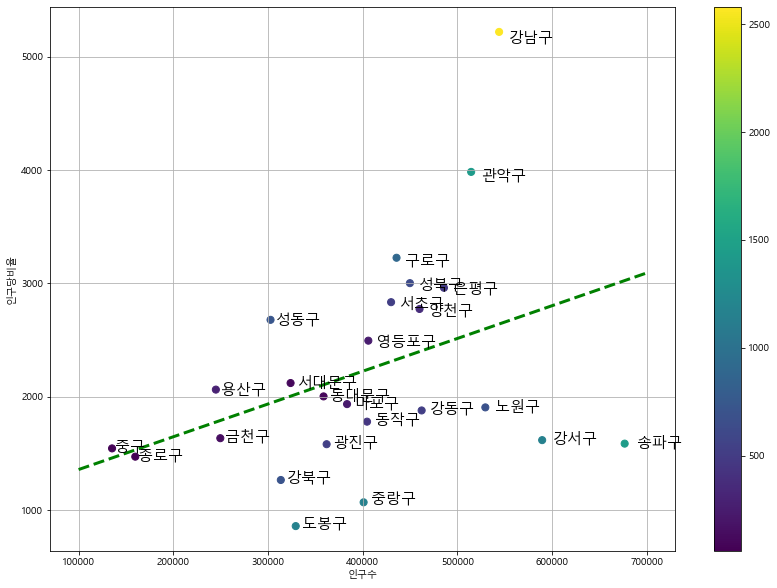

In [121]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(len(df_sort)):
    plt.text(df_sort['인구수'][n]*1.02, 
             df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()